In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport

In [111]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [112]:
combined=pd.concat([train,test])
combined.shape #2919
#combined.iloc[:1460:,:] #train
#combined.iloc[1460:,:] #test

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2919, 81)

In [113]:
combined=combined.reset_index()

In [128]:
from preprocess import impute
all_data, encodedDic = impute (combined, False)
all_data_onehot, encodedDic = impute (combined, True) #one-hot

In [142]:
train=all_data.iloc[:1460:,:] #train
train_y=train["SalePrice"]
train_x=train[train.columns[train.columns!="SalePrice"]]
test=all_data.iloc[1460:,:]

train_onehot=all_data_onehot.iloc[:1460:,:] #train
train_y_onehot=train_onehot["SalePrice"]
train_x_onehot=train_onehot[train_onehot.columns[train_onehot.columns!="SalePrice"]]
test_onehot=all_data_onehot.iloc[1460:,:].drop(columns="SalePrice")


## RR: label encoding

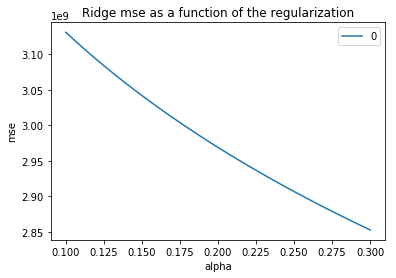

In [93]:
from sklearn import linear_model
ridge = linear_model.Ridge(normalize=True) # create a ridge regression instance


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=2)

alpha_100 = np.linspace(0.1,0.3,100)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)



df_mse = pd.DataFrame(msetotal, index=alpha_100)
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot( title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()

In [70]:
ridge.predict(X_test)

array([227577.21702408, 194251.52422304, 105297.32506833,  80375.91532951,
       135937.78069232, 301607.50014446, 289155.87279029, 145713.09288453,
       224384.89767091, 252544.57966965, 189466.2261465 ,  15265.3732039 ,
       230556.86484856, 288558.53702549, 244206.9324434 , 100074.9838003 ,
       101027.74874463, 115591.58120227, 238119.20303017, 123969.5597471 ,
       114566.78878486, 132763.56976448, 247778.45863375, 336673.74336637,
        76903.22483843, 221784.2178638 , 132713.88425115, 174272.68449476,
       384801.44541454, 135505.87935582, 151923.25086472, 125360.52943008,
       113837.44504842,  62737.40214418, 164254.27695698, 318229.85359036,
       130222.86940048,  72968.02199855, 256259.9700602 , 106794.22599291,
       141343.25307437, 137739.67804736,  98466.01504039, 120715.84685333,
       175464.85905016, 157586.09725645, 117918.13960589, 207521.66500895,
       237578.66666833, 263734.56293081,  96831.41441114, 289307.00045127,
       125222.42030728, 2

## RR: onehot

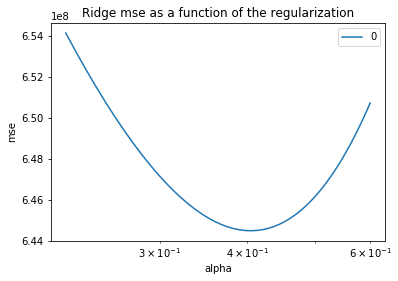

In [159]:
from sklearn import linear_model
ridge = linear_model.Ridge(normalize=True) # create a ridge regression instance

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train_x_onehot, train_y_onehot, test_size=0.2, random_state=4)

alpha_100 = np.linspace(0.22,0.6, 50)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)



df_mse = pd.DataFrame(msetotal, index=alpha_100)
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()

In [153]:
df_mse

,0
0.220000,6.105905e+08
0.227755,6.097187e+08
0.235510,6.089083e+08
0.243265,6.081554e+08
0.251020,6.074566e+08
0.258776,6.068088e+08
0.266531,6.062092e+08
0.274286,6.056554e+08
0.282041,6.051451e+08
0.289796,6.046762e+08


In [155]:
from sklearn import linear_model
ridge = linear_model.Ridge(normalize=True) # create a ridge regression instance
#ridge.set_params(alpha = 0.4)
ridge.fit(train_x_onehot,train_y_onehot)
res=ridge.predict(test_onehot)

array([110518.18343192, 167984.71170808, 181778.90632259, ...,
       163802.64383137, 108088.49277619, 219657.79294315])

In [156]:
 mean_squared_error(train_y_onehot, ridge.predict(train_x_onehot))

747423525.3023695

In [148]:
np.savetxt("res.csv", res, delimiter=",")